In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost streamlit joblib plotly jupyter



  Using cached pandas-2.3.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.5-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached streamlit-1.51.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler


In [4]:
df=pd.read_csv(r'C:\Users\theyo\OneDrive\Desktop\DS task\Multiple_Disease_Prediction\Data\kidney_disease - kidney_disease (1).csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
df.shape

(400, 26)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
df.describe(include="all")

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,248,335,396,396,...,330,295,270,398,398,398,399,399,399,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,...,43,90,46,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,normal,normal,notpresent,notpresent,...,52,9800,5.2,no,no,no,good,no,no,ckd
freq,NaN,NaN,NaN,NaN,NaN,NaN,201,259,354,374,...,21,11,18,251,261,364,317,323,339,250
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [18]:
df['age'].value_counts()

age
60.0    19
65.0    17
50.0    12
48.0    12
55.0    12
        ..
90.0     1
2.0      1
78.0     1
22.0     1
79.0     1
Name: count, Length: 76, dtype: int64

In [19]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [20]:
# Step 6: Handle missing values

cat_cols = df.select_dtypes(include=["object"]).columns
num_cols = df.select_dtypes(exclude=["object"]).columns

# Fill categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill numerical columns with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


C:\Users\theyo\AppData\Local\Temp\ipykernel_18620\761443173.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\theyo\AppData\Local\Temp\ipykernel_18620\761443173.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [21]:
# Step 7: Encode categorical values (text → numbers)

encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


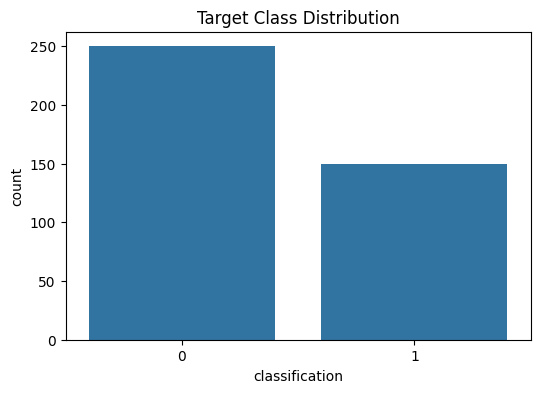

In [22]:
# Step 8: Visualize target class balance

plt.figure(figsize=(6,4))
sns.countplot(x=df["classification"])
plt.title("Target Class Distribution")
plt.show()


In [23]:
# Step 9: Scale numerical features (for ML models)

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [25]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,-1.727726,-0.210031,0.254214,0.421486,0.076249,-0.380269,1,1,0,0,...,30,69,30,1,1,0,0,0,0,0
1,-1.719066,-2.627234,-1.972476,0.421486,2.363728,-0.380269,1,1,0,0,...,24,53,30,0,0,0,0,0,0,0
2,-1.710406,0.615355,0.254214,-1.421074,0.838742,2.507853,1,1,0,0,...,17,67,30,0,1,0,1,0,1,0
3,-1.701745,-0.210031,-0.488016,-2.342354,2.363728,-0.380269,1,0,1,0,...,18,59,17,1,0,0,1,1,1,0
4,-1.693085,-0.033163,0.254214,-1.421074,0.838742,-0.380269,1,1,0,0,...,21,65,24,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.693085,0.202662,0.254214,0.421486,-0.686244,-0.380269,1,1,0,0,...,33,59,27,0,0,0,0,0,0,1
396,1.701745,-0.563768,-0.488016,1.342766,-0.686244,-0.380269,1,1,0,0,...,40,69,40,0,0,0,0,0,0,1
397,1.710406,-2.332453,0.254214,0.421486,-0.686244,-0.380269,1,1,0,0,...,35,58,32,0,0,0,0,0,0,1
398,1.719066,-2.037673,-1.230246,1.342766,-0.686244,-0.380269,1,1,0,0,...,37,64,37,0,0,0,0,0,0,1


In [26]:
df[['pcv','wc','rc']].dtypes


pcv    int64
wc     int64
rc     int64
dtype: object

In [27]:
# -------------------------------------------------------------
# Step 10: Save cleaned dataset for model training
# -------------------------------------------------------------
df.to_csv("kidney_cleaned.csv", index=False)
print("Cleaned dataset saved as kidney_cleaned.csv")


Cleaned dataset saved as kidney_cleaned.csv
